In [58]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


In [59]:
av=pd.read_csv('new_avocado.csv')
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [60]:
av.shape

(16468, 14)

In [61]:
av.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [63]:
av.drop('Unnamed: 0',axis=1,inplace=True)
print(av.head())

         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type    year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015.0   
1     9505.56     9408.07       97.49          0.0  conventional  2015.0   
2     8145.35     8042.21      103.14          0.0  conventional  2015.0   
3     5811.16     5677.40      133.76          0.0  conventional  2015.0   
4     6183.95     5986.26      197.69          0.0  conventional  2015.0   

   region  
0  Albany  
1  Albany  
2  Albany  
3  Albany  
4  Albany  


In [64]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [65]:
av['Date']=pd.to_datetime(av['Date'])
av['Date']




0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-06-12
4       2015-11-29
           ...    
16463          NaT
16464          NaT
16465          NaT
16466          NaT
16467          NaT
Name: Date, Length: 16468, dtype: datetime64[ns]

In [66]:
av['Month']=av['Date'].dt.month


In [67]:
av['Day']=av['Date'].dt.day


In [68]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0,12.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0


In [70]:
av.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Month           14951
Day             14951
dtype: int64

<AxesSubplot:>

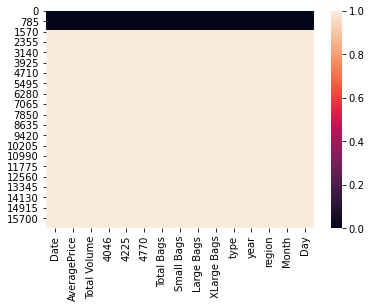

In [71]:
sns.heatmap(av.isnull())

In [75]:
av.shape

(16468, 15)

In [76]:
av.dropna(how='all',inplace=True)

In [77]:
av.shape

(1517, 15)

<AxesSubplot:>

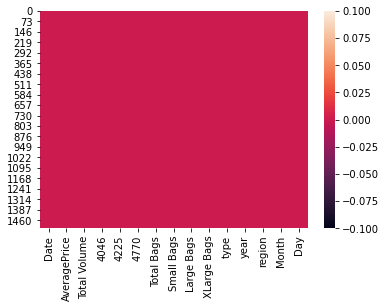

In [78]:
sns.heatmap(av.isnull())

In [89]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [94]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(av['XLarge Bags']))
z

array([0.29272731, 0.29272731, 0.29272731, ..., 0.1820374 , 0.29272731,
       0.29272731])

In [95]:
threshold=3
print(np.where(z>3))   # no outliers

(array([ 398,  401,  409,  412, 1016, 1017, 1182, 1184, 1187, 1189, 1190,
       1191, 1195, 1198, 1202, 1450, 1451, 1452, 1453, 1454, 1455, 1456,
       1457, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
       1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479,
       1480, 1481, 1483], dtype=int64),)
